In [1]:
# Importing the libraries 
import os
from os.path import basename
from pathlib import Path
import numpy as np  
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt
import scikitplot as skplt
from mlxtend.plotting import plot_confusion_matrix

# Setting root directory and type of ground truth (Should be updated for a particular machine)
root_dir = 'G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data'
base_path = 'G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data/'
groundtruth_type = 'All_3D'

In [2]:
# Iterate over subfolders under root_directory to get biopsy names
os.chdir(root_dir)

# Get all files' and folders' names in the current directory
biopsy_filenames= os.listdir (".")

biopsy_names = []
# loop through all the files and folders
for filename in biopsy_filenames:
    # Check whether the current object is a folder or not
    if os.path.isdir(os.path.join(os.path.abspath("."), filename)):
        biopsy_names.append(filename)
        
biopsy_names.sort()
print(biopsy_names)

['F33', 'F44']


In [3]:
# # Iterate over subfolders under respective biopsy directory to get class_labels
# os.chdir(os.path.join(root_dir,biopsy_names[0]))

# classlabel_filenames= os.listdir (".") # get all files' and folders' names in the current directory

# class_labels = []
# for filename in classlabel_filenames: # loop through all the files and folders
#     if os.path.isdir(os.path.join(os.path.abspath("."), filename)): # check whether the current object is a folder or not
#         class_labels.append(filename)
        
# class_labels.sort()
class_labels = ['CD', 'CD31_glom', 'CD31_inter', 'CD45', 'DCT', 'Nestin', 'S2S3', 'TAL']
print(class_labels)

['CD', 'CD31_glom', 'CD31_inter', 'CD45', 'DCT', 'Nestin', 'S2S3', 'TAL']


In [4]:
# Save training and test data into 'list' objects
rndForestXInput = []
rndForestYLabel = []

# Iterate over Biopsy_0 (F33 dataset in this case)
directory = os.path.join(root_dir,biopsy_names[0])
for root,dirs,files in os.walk(directory):
    for file in files:
        currpath = Path(os.path.join(root, file))
        if (basename(currpath.parent) == groundtruth_type):
            if file.endswith(".csv"):
                print(root)
                print(file)
                f = pd.read_csv(os.path.join(root,file), header=None)
                # Import image data (from  csv files) and corresponding labels and save them in list objects respectively
                for fileiter in range(0,len(f) - 1):
                    x = []
                    x = np.asarray(f.iloc[fileiter][2:])
                    rndForestXInput.append(x[0:len(x) - 1])
                    if((basename(Path(root).parent) == 'CD45.0') or (basename(Path(root).parent) == 'CD45.1') or (basename(Path(root).parent) == 'CD45.2')):
                        rndForestYLabel.append('CD45')
                    elif((basename(Path(root).parent) == 'S1S2') or (basename(Path(root).parent) == 'S2S3')):
                        rndForestYLabel.append('S2S3')
                    else:
                        rndForestYLabel.append(basename(Path(root).parent))

# Iterate over Biopsy_1 (F44 dataset in this case)
directory = os.path.join(root_dir,biopsy_names[1])
for root,dirs,files in os.walk(directory):
    for file in files:
        currpath = Path(os.path.join(root, file))
        if (basename(currpath.parent) == groundtruth_type):
            if file.endswith(".csv"):
                print(root)
                print(file)
                f = pd.read_csv(os.path.join(root,file), header=None)
                # Import image data (from  csv files) and corresponding labels and save them in list objects respectively
                for fileiter in range(0,len(f) - 1):
                    x = []
                    x = np.asarray(f.iloc[fileiter][2:])
                    rndForestXInput.append(x[0:len(x) - 1])
                    if((basename(Path(root).parent) == 'CD45.0') or (basename(Path(root).parent) == 'CD45.1') or (basename(Path(root).parent) == 'CD45.2')):
                        rndForestYLabel.append('CD45')
                    elif((basename(Path(root).parent) == 'S1S2') or (basename(Path(root).parent) == 'S2S3')):
                        rndForestYLabel.append('S2S3')
                    else:
                        rndForestYLabel.append(basename(Path(root).parent))
                    
print(rndForestYLabel[0:5])

G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\CD\All_3D
images_ 1_F33_DCT_CD_102319.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\CD31_glom\All_3D
images_ 1_F33_Glom_102619.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\CD31_inter\All_3D
images_ 1_F33_Glom_102619.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\CD45.0\All_3D
images_ 1_F33_CD45_subgated_011720.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\CD45.1\All_3D
images_ 1_F33_CD45_1_subgated_011720.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\CD45.2\All_3D
images_ 1_F33_CD45_2_subgated_011720.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\DCT\All_3D
images_ 1_F33_DCT_CD_102319.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\Nestin\All_3D
images_ 1_F33_Gloms_102319.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\S1S2\All_3D
images_ 1_F33_PT_TAL_S1S2_102319.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\S2S3\All_3D
images_ 1_F33_PT_TAL_102319.csv
G:/IUSM/2020/2020_02_06 Nephnet_v0.1_Data\F33\TAL\All_3D
im

In [5]:
# Map labels (folder names representing class_labels) to integer values
LABEL_MAP = {
0: "CD",
1: "CD31_glom",
2: "CD31_inter",
3: "CD45",
4: "DCT",
5: "Nestin",
6: "S2S3",
7: "TAL"}

reverse_train_labels = dict((v,k) for k,v in LABEL_MAP.items())
rndForestYLabelInt = []

for labeliter in range(0,len(rndForestYLabel)):
    rndForestYLabelInt.append(reverse_train_labels[rndForestYLabel[labeliter]])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(rndForestXInput, rndForestYLabelInt, random_state=0)

print(len(X_train))
print(len(X_test))

97928
32643


In [7]:
# Train data using Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 200, random_state = 0)
clf.fit(np.asarray(X_train), np.asarray(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Get classifier output with probabilities for all available classes
y_classifierpred = clf.predict_proba(np.asarray(X_test))

In [9]:
# Get classifier output with single classification label
y_classifierpredSingle = clf.predict(np.asarray(X_test))

In [10]:
# Get confusion matrix for predicted single classification
confusion_matrix(np.asarray(y_test), np.asarray(y_classifierpredSingle), labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[2629,    0,   50,  114,  138,    0,  900,  277],
       [  97,    0,  349,  501,    5,    1,  132,   54],
       [ 304,    0, 1909,  858,   38,    0,  483,  140],
       [ 455,    0, 1056, 1428,   36,    0,  744,  242],
       [1070,    0,   56,   88,  243,    0, 1095,  210],
       [ 186,    0,  278,  403,    6,    0,  535,  235],
       [ 477,    0,  234,  248,   73,    0, 6698, 1171],
       [ 311,    0,  111,  140,   14,    0, 2966, 2855]], dtype=int64)

In [11]:
# Calculate F1-score
f1_score(np.asarray(y_test), np.asarray(y_classifierpredSingle), average='weighted')

C:\Users\Suraj Khochare\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4412784341218078

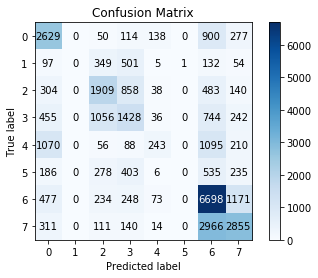

In [12]:
# Plot confusion matrix (low resolution image)
skplt.metrics.plot_confusion_matrix(np.asarray(y_test), np.asarray(y_classifierpredSingle))

In [13]:
# Calculate Balanced Accuracy Score
balAccuracy = balanced_accuracy_score(np.asarray(y_test), np.asarray(y_classifierpredSingle))
balAccuracyPercent = round(balAccuracy*100, 2)
print(balAccuracyPercent)

34.98


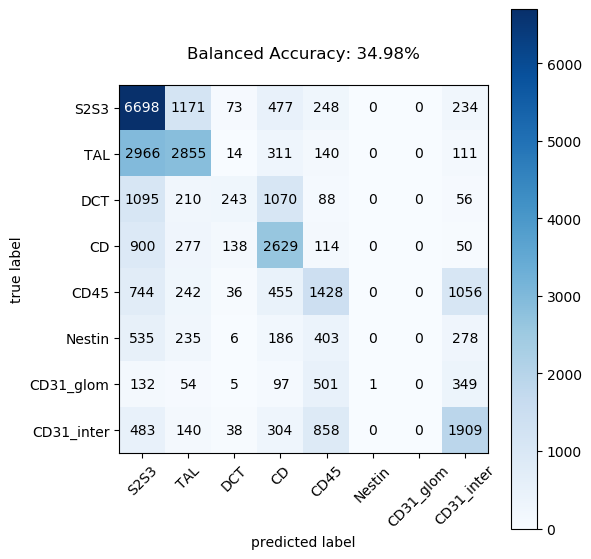

In [14]:
# Plot confusion matrix (high-resolution image)
plt.rcParams.update(plt.rcParamsDefault)

balAccuracyPercentStr = str(balAccuracyPercent)
class_labels = ['S2S3', 'TAL', 'DCT', 'CD', 'CD45', 'Nestin', 'CD31_glom', 'CD31_inter']

mat = confusion_matrix(np.asarray(y_test), np.asarray(y_classifierpredSingle), labels=[6, 7, 4, 0, 3, 5, 1, 2])
fig, ax = plot_confusion_matrix(conf_mat = mat, figsize=(6,6), class_names = class_labels, colorbar = True)
plt.tight_layout()
plt.title('Balanced Accuracy: ' + balAccuracyPercentStr + '%')
fig.savefig('E:/2020_03_12 Nephnet_v0.1_Data/RandomForest_All3D_ConfusionMatrix.png')